In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer, LabelEncoder

import sklearn.metrics as metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
def r2adj(model, X, y):
    return 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

In [3]:
test = pd.read_csv(('../created_datasets/test_etc_cols_clean.csv'))
test.drop(columns = 'Unnamed: 0', inplace = True)
test.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Roof_Style_Is_Hip,Foundation_Is_PConc,Heating_Is_Ideal,BsmtFin_Type_1_Is_GLQ,Exterior_1st_Good,Exterior_2nd_Good,Fence_Valued,Mas_Vnr_Type_Good,Bldg_Type_Good,Paved_Drive_Yes
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,1,0,0,0,0,0,0,1
1,2718,905108090,90,RL,0.0,9662,Pave,NaN,IR1,Lvl,...,0,0,1,0,0,0,0,0,0,1
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,1,1,1,1,0,0,0,1,1
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,1,0,0,0,0,0,1,0
4,625,535105100,20,RL,0.0,9500,Pave,NaN,IR1,Lvl,...,0,0,1,0,0,0,0,1,1,1


In [4]:
train = pd.read_csv('../created_datasets/train_etc_cols_clean.csv')
train.drop(columns = 'Unnamed: 0', inplace = True)
train.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Roof_Style_Is_Hip,Foundation_Is_PConc,Heating_Is_Ideal,BsmtFin_Type_1_Is_GLQ,Exterior_1st_Good,Exterior_2nd_Good,Fence_Valued,Mas_Vnr_Type_Good,Bldg_Type_Good,Paved_Drive_Yes
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,0,0,1,1,0,0,0,1,1,1
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,1,1,1,1,0,0,1,1,1
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,1,1,1,0,0,0,1,1
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,1,1,0,1,0,0,0,1,1
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,1,1,0,0,0,0,0,1,0


#### Avoid columns Garage_Yr_Blt

In [5]:
pricecorr = train.corr()[['SalePrice']].sort_values('SalePrice').iloc[:-1, :]
pricecorr

,SalePrice
Nbhd_Quantile_1,-0.425445
Garage_Type_Is_Valued,-0.378850
PID,-0.255052
Nbhd_Quantile_2,-0.165895
Enclosed_Porch,-0.135656
...,...
Garage_Area,0.649897
Kitchen_Qual,0.692336
Gr_Liv_Area,0.697038
Exter_Qual,0.712146


In [6]:
ovrqualcorr = train.corr()[['Overall_Qual']].sort_values('Overall_Qual').iloc[:-1, :]
ovrqualcorr['Overall_Qual'].sort_values(ascending=True).head(50)

Nbhd_Quantile_1         -0.404138
Garage_Type_Is_Valued   -0.350262
PID                     -0.265863
Kitchen_AbvGr           -0.170964
Nbhd_Quantile_2         -0.157194
Enclosed_Porch          -0.154554
Nbhd_Quantile_3         -0.136165
Functional_Is_Bad       -0.104088
Overall_Cond            -0.082770
Id                      -0.061483
Low_Qual_Fin_SF         -0.052338
Bsmt_Half_Bath          -0.047006
Utilities_Is_Bad        -0.046278
BsmtFin_SF_2            -0.027973
Yr_Sold                 -0.011578
Fence_Valued            -0.009210
Pool_Area                0.006558
Mo_Sold                  0.019242
Exter_Cond               0.020425
Misc_Val                 0.022099
Pool_QC                  0.022724
3Ssn_Porch               0.031938
MS_SubClass              0.035763
Screen_Porch             0.048752
Bedroom_AbvGr            0.053373
Street_Is_Paved          0.063232
Alley_Is_Paved           0.069493
Condition_1_Is_Pos       0.081682
Heating_Is_Ideal         0.097020
Lot_Area      

In [7]:
ovrqualcorr = train.corr()[['Overall_Qual']].sort_values('Overall_Qual').iloc[:-1, :]
ovrqualcorr['Overall_Qual'].sort_values(ascending=False).head(50)

SalePrice                0.800207
Exter_Qual               0.740257
Kitchen_Qual             0.690639
Bsmt_Qual                0.654071
Year_Built               0.602964
Garage_Cars              0.587447
Year_Built_Above_2k      0.584925
Year_Remod/Add           0.584654
Garage_Yr_Blt            0.574553
Foundation_Is_PConc      0.571092
Gr_Liv_Area              0.566701
Garage_Area              0.563904
Garage_Finish            0.554583
Total_Bsmt_SF            0.549407
Full_Bath                0.515080
Nbhd_Quantile_5          0.514956
Year_Remod_Above_2k      0.484401
Fireplace_Qu             0.480804
1st_Flr_SF               0.477136
Heating_QC               0.475555
BsmtFin_Type_1_Is_GLQ    0.458974
Mas_Vnr_Area             0.430041
Mas_Vnr_Type_Good        0.414148
Exterior_1st_Good        0.408376
Fireplaces               0.388920
TotRms_AbvGrd            0.382025
Bsmt_Exposure            0.360359
Fireplace_Is4            0.355652
Sale_Type_Is_New         0.335389
Paved_Drive_Ye

<AxesSubplot:>

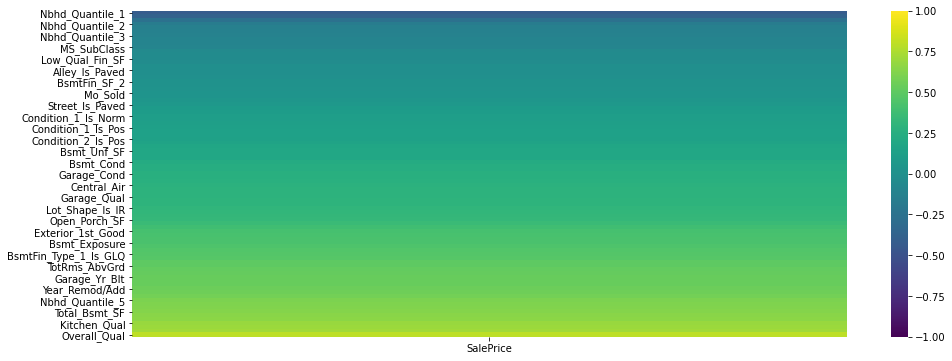

In [8]:
plt.figure(figsize=(16,6))
sns.heatmap(pricecorr, cmap = 'viridis', vmin = -1, vmax = 1)

# BASELINE SETTING

In [9]:
baselinedf = train[['Id', 'SalePrice']]
baselinedf['baseline_mean'] = baselinedf['SalePrice'].mean()

<ipython-input-9-9547d369d4e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baselinedf['baseline_mean'] = baselinedf['SalePrice'].mean()


In [10]:
baselinedf

,Id,SalePrice,baseline_mean
0,109,130500,181469.701609
1,544,220000,181469.701609
2,153,109000,181469.701609
3,318,174000,181469.701609
4,255,138500,181469.701609
...,...,...,...
2046,1587,298751,181469.701609
2047,785,82500,181469.701609
2048,916,177000,181469.701609
2049,639,144000,181469.701609


In [11]:
X = baselinedf[['baseline_mean']]
y = baselinedf[['SalePrice']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
X_train.head()

,baseline_mean
532,181469.701609
415,181469.701609
273,181469.701609
1460,181469.701609
250,181469.701609


In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
lr.score(X_train, y_train)

0.0

In [15]:
lr.score(X_test, y_test)

-0.00043273813883448753

In [16]:
cross_val_score(lr, X_train, y_train).mean()

-0.0009377481689546663

In [17]:
preds = lr.predict(X_train)

In [18]:
metrics.r2_score(preds, y_train)

0.0

## FIRST FEATURE SETTING


In [19]:
features = ['Fireplace_Is4', 'BsmtFin_Type_1_Is_GLQ', 'Foundation_Is_PConc',
           'MS_Zoning_Is_Valued','Nbhd_Quantile_1', 'Nbhd_Quantile_5', 'Year_Built_Above_2k',
           'Garage_Qual_Is3', 'Nbhd_Quantile_4', 'Bsmt_Cond_Is3', 'Exter_Cond_Is3',
           'Nbhd_Quantile_2']
X = train[features]
y = train['SalePrice']

In [20]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [21]:
vif_data

,feature,VIF
0,Fireplace_Is4,1.573627
1,BsmtFin_Type_1_Is_GLQ,1.934817
2,Foundation_Is_PConc,3.822857
3,MS_Zoning_Is_Valued,7.107956
4,Nbhd_Quantile_1,1.691826
5,Nbhd_Quantile_5,1.854093
6,Year_Built_Above_2k,2.938846
7,Garage_Qual_Is3,8.640956
8,Nbhd_Quantile_4,1.981215
9,Bsmt_Cond_Is3,8.513908


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
X_train.head()

,Fireplace_Is4,BsmtFin_Type_1_Is_GLQ,Foundation_Is_PConc,MS_Zoning_Is_Valued,Nbhd_Quantile_1,Nbhd_Quantile_5,Year_Built_Above_2k,Garage_Qual_Is3,Nbhd_Quantile_4,Bsmt_Cond_Is3,Exter_Cond_Is3,Nbhd_Quantile_2
532,1,0,0,1,0,0,0,1,0,1,1,0
415,1,0,0,1,0,0,0,1,0,1,0,1
273,0,0,0,1,0,0,0,1,0,1,1,0
1460,0,1,1,1,0,0,0,1,1,1,1,0
250,0,0,1,1,0,1,0,1,0,1,1,0


In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
lr.score(X_train, y_train)

0.6190183324438401

In [25]:
lr.score(X_test, y_test)

0.5871757500521992

In [26]:
cross_val_score(lr, X_train, y_train).mean()

0.60925065827024

In [27]:
preds = lr.predict(X_train)

In [28]:
metrics.r2_score(preds, y_train)

0.38453895856028897

In [29]:
metrics.mean_squared_error(preds, y_train)

2409526262.477012

In [30]:
metrics.mean_squared_error(preds, y_train, squared = False)

49086.92557572752

In [31]:
metrics.mean_absolute_error(preds, y_train)

33675.492932813366

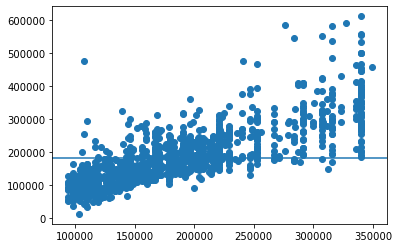

In [32]:
plt.scatter(preds, y_train)
plt.axhline(y_train.mean())

(array([ 34., 390., 620., 263., 129.,  51.,  28.,  10.,   6.,   7.]),
 array([ 13100. ,  72955.7, 132811.4, 192667.1, 252522.8, 312378.5,
        372234.2, 432089.9, 491945.6, 551801.3, 611657. ]),
 <BarContainer object of 10 artists>)

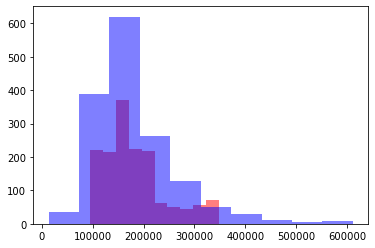

In [33]:
plt.hist(preds, color='r', alpha=.5)
plt.hist(y_train, color = 'blue', alpha=.5)

In [34]:
lr.score(X_test, y_test)

0.5871757500521992

In [35]:
cross_val_score(lr, X_test, y_test).mean()

0.590397246778086

In [36]:
testpreds = lr.predict(X_test)

In [37]:
metrics.r2_score(testpreds, y_test)

0.3818605475266972

In [38]:
metrics.mean_squared_error(testpreds, y_test)

2534751103.9515524

In [39]:
metrics.mean_squared_error(testpreds, y_test, squared = False)

50346.31172143151

In [40]:
metrics.mean_absolute_error(testpreds, y_test)

35419.769673683535

FIRST FEATURES DONE

In [41]:
features = ['Nbhd_Quantile_1', 'Nbhd_Quantile_2', 'Nbhd_Quantile_4', 'Nbhd_Quantile_5',
            'Fireplace_Is4', 'Exterior_1st_Good',
            'Year_Built_Above_2k', 'BsmtFin_Type_1_Is_GLQ', 'Overall_Qual', 'Foundation_Is_PConc',
           'MS_SubClass', 'Open_Porch_SF', 'Mas_Vnr_Area', 'Wood_Deck_SF']
X = train[features]
y = train['SalePrice']

In [42]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [43]:
vif_data

,feature,VIF
0,Nbhd_Quantile_1,1.720479
1,Nbhd_Quantile_2,1.263081
2,Nbhd_Quantile_4,2.052317
3,Nbhd_Quantile_5,2.070503
4,Fireplace_Is4,1.646683
5,Exterior_1st_Good,2.942715
6,Year_Built_Above_2k,3.199854
7,BsmtFin_Type_1_Is_GLQ,2.028476
8,Overall_Qual,8.044333
9,Foundation_Is_PConc,4.202299


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
X_train.head()

,Nbhd_Quantile_1,Nbhd_Quantile_2,Nbhd_Quantile_4,Nbhd_Quantile_5,Fireplace_Is4,Exterior_1st_Good,Year_Built_Above_2k,BsmtFin_Type_1_Is_GLQ,Overall_Qual,Foundation_Is_PConc,MS_SubClass,Open_Porch_SF,Mas_Vnr_Area,Wood_Deck_SF
532,0,0,0,0,1,0,0,0,6,0,20,44,302.0,0
415,0,1,0,0,1,0,0,0,7,0,70,0,0.0,521
273,0,0,0,0,0,1,0,0,5,0,20,0,0.0,194
1460,0,0,1,0,0,0,0,1,7,1,60,44,0.0,296
250,0,0,0,1,0,1,0,0,8,1,60,87,466.0,192


In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
lr.score(X_train, y_train)

0.7619164158515099

In [47]:
lr.score(X_test, y_test)

0.7703534506557763

In [48]:
cross_val_score(lr, X_train, y_train).mean()

0.7520666247510199

In [49]:
preds = lr.predict(X_train)

In [50]:
metrics.r2_score(preds, y_train)

0.6875200754371331

In [51]:
metrics.mean_squared_error(preds, y_train, squared=False)

38804.18074901815

(array([ 34., 390., 620., 263., 129.,  51.,  28.,  10.,   6.,   7.]),
 array([ 13100. ,  72955.7, 132811.4, 192667.1, 252522.8, 312378.5,
        372234.2, 432089.9, 491945.6, 551801.3, 611657. ]),
 <BarContainer object of 10 artists>)

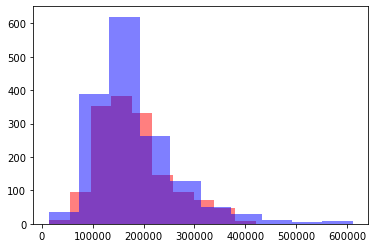

In [52]:
plt.hist(preds, color ='r', alpha=.5)
plt.hist(y_train, color='blue', alpha=.5)

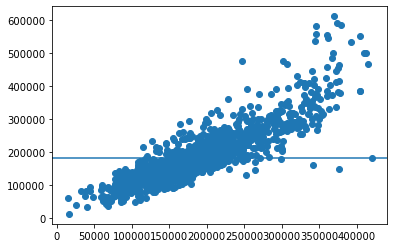

In [53]:
plt.scatter(preds, y_train)
plt.axhline(y_train.mean())

In [54]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(X)

X_test_poly = poly.transform(X_test)

X_poly = poly.transform(X_train)
X_poly

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 9.12040e+04,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.71441e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 3.76360e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 9.80100e+03,
        2.62350e+04, 7.02250e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.61290e+04,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 5.95360e+04,
        5.34360e+04, 4.79610e+04]])

In [55]:
features = poly.get_feature_names(features)
features

['Nbhd_Quantile_1',
 'Nbhd_Quantile_2',
 'Nbhd_Quantile_4',
 'Nbhd_Quantile_5',
 'Fireplace_Is4',
 'Exterior_1st_Good',
 'Year_Built_Above_2k',
 'BsmtFin_Type_1_Is_GLQ',
 'Overall_Qual',
 'Foundation_Is_PConc',
 'MS_SubClass',
 'Open_Porch_SF',
 'Mas_Vnr_Area',
 'Wood_Deck_SF',
 'Nbhd_Quantile_1^2',
 'Nbhd_Quantile_1 Nbhd_Quantile_2',
 'Nbhd_Quantile_1 Nbhd_Quantile_4',
 'Nbhd_Quantile_1 Nbhd_Quantile_5',
 'Nbhd_Quantile_1 Fireplace_Is4',
 'Nbhd_Quantile_1 Exterior_1st_Good',
 'Nbhd_Quantile_1 Year_Built_Above_2k',
 'Nbhd_Quantile_1 BsmtFin_Type_1_Is_GLQ',
 'Nbhd_Quantile_1 Overall_Qual',
 'Nbhd_Quantile_1 Foundation_Is_PConc',
 'Nbhd_Quantile_1 MS_SubClass',
 'Nbhd_Quantile_1 Open_Porch_SF',
 'Nbhd_Quantile_1 Mas_Vnr_Area',
 'Nbhd_Quantile_1 Wood_Deck_SF',
 'Nbhd_Quantile_2^2',
 'Nbhd_Quantile_2 Nbhd_Quantile_4',
 'Nbhd_Quantile_2 Nbhd_Quantile_5',
 'Nbhd_Quantile_2 Fireplace_Is4',
 'Nbhd_Quantile_2 Exterior_1st_Good',
 'Nbhd_Quantile_2 Year_Built_Above_2k',
 'Nbhd_Quantile_2 BsmtFin_

In [56]:
cross_val_score(lr,X_poly, y_train).mean()

0.7704637141730599

In [57]:
sc = StandardScaler()
sc.fit(X_poly)
Z_train = sc.transform(X_poly)
Z_test = sc.transform(X_test_poly)

print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y_test.shape}')

ols = LinearRegression()
ols.fit(Z_train, y_train)

ols.score(Z_train, y_train), ols.score(Z_test, y_test)

Z_train shape is: (1538, 119)
y_train shape is: (1538,)
Z_test shape is: (513, 119)
y_test shape is: (513,)


(0.8248988452174175, 0.7664472487385341)

In [58]:
# Instantiate.
ridge = Ridge(alpha=16.0)
# Fit.
ridge.fit(Z_train, y_train)
# Evaluate model using R2.
ridge.score(Z_train, y_train), ridge.score(Z_test, y_test)

(0.8221161457465458, 0.7678520328252068)

In [59]:
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
alphas = np.logspace(0, 5, 100)
# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=alphas, cv=5)
# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train);

In [60]:
ridge_cv.alpha_

93.26033468832199

In [61]:
ridge_cv.best_score_

0.7817412111475832

In [62]:
ridge_cv.score(Z_train, y_train), ridge_cv.score(Z_test, y_test)

(0.8162007323199854, 0.7784623052636249)

In [63]:
ols.score(Z_train, y_train), ols.score(Z_test, y_test)

(0.8248988452174175, 0.7664472487385341)

In [64]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)
lasso = LassoCV(alphas=l_alphas, cv=5)
# Cross-validate over our list of Lasso alphas.
lasso.fit(Z_train, y_train)
# Fit model using best ridge alpha!

lasso.alpha_

l_alphas[[0, -1]]

lasso.score(Z_train, y_train), lasso.score(Z_test, y_test)


/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275897088877.1421, tolerance: 778133067.1215106
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247786636635.34888, tolerance: 778133067.1215106
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264978964308.23096, tolerance: 778133067.1215106
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258438685074.68665, tolerance: 778133067.1215106
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258433544515.51, tolerance: 778133067.1215106
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258428758487.5598, tolerance: 778133067.1215106
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/pyth

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258368924829.56738, tolerance: 778133067.1215106
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258368550253.49817, tolerance: 778133067.1215106
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258368195027.8623, tolerance: 778133067.1215106
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258363941178.46667, tolerance: 778133067.1215106
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258363912473.0398, tolerance: 778133067.1215106
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258363852493.88684, tolerance: 778133067.1215106
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285312213985.22034, tolerance: 803375304.0487227
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247474296981.18567, tolerance: 803375304.0487227
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244285432358.3849, tolerance: 803375304.0487227
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244225764530.8678, tolerance: 803375304.0487227
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244224908405.75745, tolerance: 803375304.0487227
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244224107612.19153, tolerance: 803375304.0487227
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244214435109.6742, tolerance: 803375304.0487227
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244214335391.5952, tolerance: 803375304.0487227
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244214242730.08142, tolerance: 803375304.0487227
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/py

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132103429898.83582, tolerance: 760708549.4053607
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132093451843.59985, tolerance: 760708549.4053607
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132084394741.11841, tolerance: 760708549.4053607
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147581892392.66772, tolerance: 760708549.4053607
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147584739403.60986, tolerance: 760708549.4053607
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147582877720.90137, tolerance: 760708549.4053607
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147570212057.36865, tolerance: 760708549.4053607
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147570054869.01953, tolerance: 760708549.4053607
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147569927520.72095, tolerance: 760708549.4053607
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105968517313.96643, tolerance: 731633840.9885501
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109258692980.54883, tolerance: 731633840.9885501
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117019668625.32678, tolerance: 731633840.9885501
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158072990496.53125, tolerance: 731633840.9885501
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158070976090.8004, tolerance: 731633840.9885501
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158069098646.90942, tolerance: 731633840.9885501
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136576763739.64722, tolerance: 816865125.5190994
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136567422108.0896, tolerance: 816865125.5190994
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136558764733.88806, tolerance: 816865125.5190994
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130103582415.90552, tolerance: 816865125.5190994
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130102884139.2008, tolerance: 816865125.5190994
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130102238248.85608, tolerance: 816865125.5190994
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/p

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130094359919.59521, tolerance: 816865125.5190994
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130094294119.90161, tolerance: 816865125.5190994
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130094235293.11914, tolerance: 816865125.5190994
  model = cd_fast.enet_coordinate_descent_gram(
/Users/adamklesc11/opt/anaconda3/lib/

(0.8248961704378165, 0.7665873733039555)

In [65]:
lasso.coef_

array([-2.53382609e+04, -2.46892211e+02,  1.31337171e+04, -1.15643321e+04,
        1.60968050e+04,  9.36313942e+03,  2.51742679e+04, -6.37086590e+03,
       -7.39503891e+02,  1.01406872e+04,  2.91088117e+04,  1.90218407e+03,
        1.48825307e+04,  6.90729749e+03,  1.28322595e+04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -5.92649172e+02, -3.73044602e+02,
        1.12076686e+03,  7.46498632e+02,  4.83364487e+03, -2.30300556e+03,
        2.63029208e+03, -5.81121777e+02, -5.96374539e+03, -3.72391105e+03,
        1.07676383e+04,  0.00000000e+00,  0.00000000e+00, -1.82816731e+03,
        6.07505015e+02,  5.20946985e-01, -7.31148746e+02, -1.36767938e+04,
       -1.66561150e+03,  3.71119941e+03, -1.49938648e+03,  2.70969601e+01,
       -1.26997468e+03, -1.38131719e+04,  0.00000000e+00, -1.85711327e+03,
       -7.95024022e+02,  1.48744129e+02, -1.93925581e+03,  1.64219401e+04,
       -7.11060166e+03, -2.99447024e+03,  1.76275373e+02, -1.51076720e+03,
       -1.61401710e+03, -

In [66]:
lasso_coefs = pd.Series(lasso.coef_, index=poly.get_feature_names(X.columns))
lasso_coefs

Nbhd_Quantile_1              -25338.260916
Nbhd_Quantile_2                -246.892211
Nbhd_Quantile_4               13133.717145
Nbhd_Quantile_5              -11564.332145
Fireplace_Is4                 16096.804959
                                  ...     
Open_Porch_SF Mas_Vnr_Area    -3667.073593
Open_Porch_SF Wood_Deck_SF    -1176.935667
Mas_Vnr_Area^2                -2899.445050
Mas_Vnr_Area Wood_Deck_SF     -2475.026637
Wood_Deck_SF^2                 8094.050556
Length: 119, dtype: float64

<AxesSubplot:>

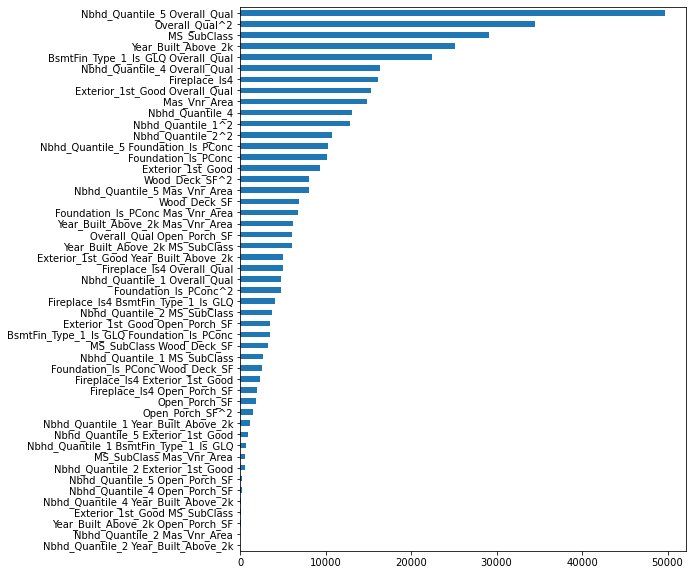

In [67]:
plt.figure(figsize=(8, 10))
lasso_coefs[lasso_coefs > 0].sort_values().plot.barh()

<AxesSubplot:>

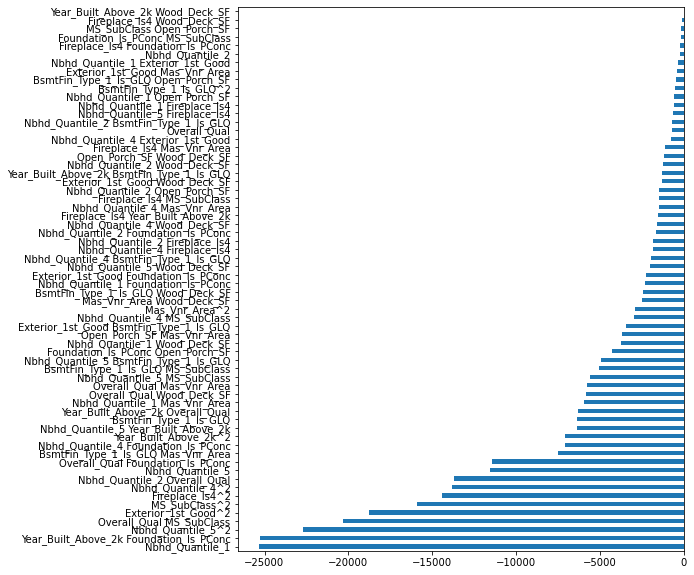

In [68]:
plt.figure(figsize=(8, 10))
lasso_coefs[lasso_coefs < 0].sort_values().plot.barh()

In [69]:
lasso_coefs[lasso_coefs < 0].sort_values().mean()

-5122.80861892992

In [70]:
lasso_coefs[lasso_coefs > 0].sort_values().mean()

8034.723645666047

In [71]:
lasso_coefs[lasso_coefs > 10473.982317790147].sort_values().sum()

260467.68123982952

In [72]:
lasso_coefs[lasso_coefs > -7437.536745670083].sort_values().sum()

266571.5653100704

In [73]:
lasso_coefs[lasso_coefs > 10473.982317790147].sort_values()

Nbhd_Quantile_2^2                     10767.638337
Nbhd_Quantile_1^2                     12832.259524
Nbhd_Quantile_4                       13133.717145
Mas_Vnr_Area                          14882.530714
Exterior_1st_Good Overall_Qual        15285.702335
Fireplace_Is4                         16096.804959
Nbhd_Quantile_4 Overall_Qual          16421.940056
BsmtFin_Type_1_Is_GLQ Overall_Qual    22502.800862
Year_Built_Above_2k                   25174.267859
MS_SubClass                           29108.811706
Overall_Qual^2                        34539.652538
Nbhd_Quantile_5 Overall_Qual          49721.555206
dtype: float64

In [74]:
lasso_coefs[lasso_coefs < -7437.536745670083].sort_values()

Nbhd_Quantile_1                           -25338.260916
Year_Built_Above_2k Foundation_Is_PConc   -25240.670198
Nbhd_Quantile_5^2                         -22731.394475
Overall_Qual MS_SubClass                  -20295.661964
Exterior_1st_Good^2                       -18751.479250
MS_SubClass^2                             -15907.220345
Fireplace_Is4^2                           -14424.634908
Nbhd_Quantile_4^2                         -13813.171853
Nbhd_Quantile_2 Overall_Qual              -13676.793822
Nbhd_Quantile_5                           -11564.332145
Overall_Qual Foundation_Is_PConc          -11451.915571
BsmtFin_Type_1_Is_GLQ Mas_Vnr_Area         -7534.322836
dtype: float64

In [75]:
df_lasso = pd.DataFrame()

In [76]:
df_lasso['Ovrl_Qual_Sqrd'] = train['Overall_Qual'] ** 2

In [77]:
df_lasso.head()

,Ovrl_Qual_Sqrd
0,36
1,49
2,25
3,25
4,36


LASSO AND RIDGE FOR POLYNOMIAL FEATURES 2 UNLIKELY TO PRODUCE RESULTS THAT WILL BE SATISFACTORY WITH THIS FEATURE SETTING. WILL CREATE POSSIBLE INTERACTION TERMS BASED ON DOMAIN KNOWLEDGE TO IMPLEMENT FOR LATER MODELS. FEATURES 2 AND FEATURES 1 HAVE BEEN LARGELY UNSUCCESSFUL REGARDLESS OF THE AMOUNT OF TWEAKING ACTUALLY DONE.

FEATURES 2 DONE

# CREATION OF POSSIBLE INTERACTION TERMS

In [78]:
train['Ovrl_Qual_Squared'] = train['Overall_Qual'] ** 2

In [79]:
train['FireplaceXFireplace_Qu'] = train['Fireplaces'] * train['Fireplace_Qu']

In [80]:
train['Garage_CondXQual'] = train['Garage_Cond'] * train['Garage_Qual']

In [81]:
train['Bsmt_CondXQual'] = train['Bsmt_Qual'] * train['Bsmt_Cond']

In [82]:
train['Garage_FinishXQual'] = train['Garage_Finish'] * train['Garage_Qual']

In [83]:
train['Bsmt_QualXExpo'] = train['Bsmt_Qual'] * train['Bsmt_Exposure']

In [84]:
train['Exter_Qual_Squared'] = train['Exter_Qual'] ** 2

In [85]:
train['Garage_Qual_Squared'] = train['Garage_Qual'] ** 2

In [86]:
train['Kitchen_Qual_Squared'] = train['Kitchen_Qual'] ** 2

In [87]:
train['MS_SubClassXZoning'] = train['MS_SubClass'] * train['MS_Zoning_Is_Valued']

In [88]:
train['KitchenAbvGrXKqual'] = train['Kitchen_AbvGr'] * train['Kitchen_Qual']

In [89]:
train['Gr_liv_AreaX1st_SF'] = train['Gr_Liv_Area'] * train['1st_Flr_SF']

In [90]:
train['Floor_SF'] = train['1st_Flr_SF'] + train['2nd_Flr_SF'] + train['Total_Bsmt_SF'] + train['Wood_Deck_SF']
+ train['Low_Qual_Fin_SF'] + train['Open_Porch_SF']

0        44
1        74
2        52
3         0
4        59
       ... 
2046    276
2047      0
2048      0
2049    189
2050     60
Length: 2051, dtype: int64

In [91]:
train['YearDiff'] = train['Yr_Sold'] - train['Year_Built']

In [92]:
train.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Garage_FinishXQual,Bsmt_QualXExpo,Exter_Qual_Squared,Garage_Qual_Squared,Kitchen_Qual_Squared,MS_SubClassXZoning,KitchenAbvGrXKqual,Gr_liv_AreaX1st_SF,Floor_SF,YearDiff
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,6,3,16,9,9,60,3,1072275,2204.0,34
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,6,4,16,9,9,60,3,1937386,3035.0,13
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,3,3,9,9,9,20,3,1117249,2114.0,57
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,9,4,9,9,4,60,2,1074336,1928.0,4
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,3,2,9,9,4,50,2,1200795,2121.0,110


In [93]:
train['BathsTotal'] = train['Full_Bath'] + train['Half_Bath'] + train['Bsmt_Half_Bath'] + train['Bsmt_Full_Bath']

In [94]:
train['TotRmsAbvGrd*Baths'] = train['TotRms_AbvGrd'] + train['BathsTotal']

In [95]:
train.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Exter_Qual_Squared,Garage_Qual_Squared,Kitchen_Qual_Squared,MS_SubClassXZoning,KitchenAbvGrXKqual,Gr_liv_AreaX1st_SF,Floor_SF,YearDiff,BathsTotal,TotRmsAbvGrd*Baths
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,16,9,9,60,3,1072275,2204.0,34,3.0,9.0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,16,9,9,60,3,1937386,3035.0,13,4.0,12.0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,9,9,9,20,3,1117249,2114.0,57,2.0,7.0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,9,9,4,60,2,1074336,1928.0,4,3.0,10.0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,9,9,4,50,2,1200795,2121.0,110,2.0,8.0


In [96]:
train['AdditionalSF'] = train['Wood_Deck_SF'] + train['Open_Porch_SF']

In [97]:
train['Gr_LiVnr_Area'] = train['Mas_Vnr_Area'] * train['Gr_Liv_Area']

In [98]:
train['Above_2k'] = train['Year_Remod_Above_2k'] + train['Year_Built_Above_2k']

In [99]:
train['Finishes'] = train['Overall_Qual'] * train['Garage_Finish']

#### FEATURES 3 

In [100]:
features = ['Ovrl_Qual_Squared', 'MS_SubClassXZoning', 'Gr_liv_AreaX1st_SF', 'FireplaceXFireplace_Qu',
           'Nbhd_Quantile_1', 'Nbhd_Quantile_2', 'Nbhd_Quantile_4', 'Nbhd_Quantile_5',
            '2nd_Flr_SF', 'Above_2k']
X = train[features]
y = train['SalePrice']

In [101]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [102]:
vif_data

,feature,VIF
0,Ovrl_Qual_Squared,9.567532
1,MS_SubClassXZoning,2.280882
2,Gr_liv_AreaX1st_SF,4.489961
3,FireplaceXFireplace_Qu,2.508053
4,Nbhd_Quantile_1,1.381968
5,Nbhd_Quantile_2,1.164797
6,Nbhd_Quantile_4,1.997367
7,Nbhd_Quantile_5,2.025393
8,2nd_Flr_SF,1.827417
9,Above_2k,2.581887


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
X_train.head()

,Ovrl_Qual_Squared,MS_SubClassXZoning,Gr_liv_AreaX1st_SF,FireplaceXFireplace_Qu,Nbhd_Quantile_1,Nbhd_Quantile_2,Nbhd_Quantile_4,Nbhd_Quantile_5,2nd_Flr_SF,Above_2k
532,36,20,2518569,4,0,0,0,0,0,0
415,49,70,2860954,8,0,1,0,0,1005,0
273,25,20,746496,0,0,0,0,0,0,1
1460,49,60,2951560,0,0,0,1,0,954,0
250,64,60,3128751,3,0,0,0,1,1250,0


In [104]:
lr.fit(X_train, y_train)

LinearRegression()

In [105]:
lr.score(X_train, y_train)

0.7946691325698751

In [106]:
cross_val_score(lr, X_train, y_train).mean()

0.7713389068927408

In [107]:
preds = lr.predict(X_train)

In [108]:
metrics.r2_score(preds, y_train)

0.7416146431073665

In [109]:
train.shape

(2051, 135)

#### FEATURES 4

In [110]:
features = ['Floor_SF', 'Nbhd_Quantile_1', 'Nbhd_Quantile_2', 'Nbhd_Quantile_4', 'Nbhd_Quantile_5',
            'Above_2k', 'Finishes', 'Gr_LiVnr_Area', 'Nbhd_Quantile_3',
           'Ovrl_Qual_Squared', 'FireplaceXFireplace_Qu', 'Bsmt_QualXExpo', 'TotRmsAbvGrd*Baths',
           'MS_SubClassXZoning', 'Foundation_Is_PConc']

In [111]:
X = train[features]
y = train['SalePrice']

In [112]:
XplusSP = train[features]
XplusSP['SalePrice'] = train['SalePrice']
XminusSP = X

<ipython-input-112-fd2be229544e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XplusSP['SalePrice'] = train['SalePrice']


In [113]:
XplusSP.head()

,Floor_SF,Nbhd_Quantile_1,Nbhd_Quantile_2,Nbhd_Quantile_4,Nbhd_Quantile_5,Above_2k,Finishes,Gr_LiVnr_Area,Nbhd_Quantile_3,Ovrl_Qual_Squared,FireplaceXFireplace_Qu,Bsmt_QualXExpo,TotRmsAbvGrd*Baths,MS_SubClassXZoning,Foundation_Is_PConc,SalePrice
0,2204.0,0,1,0,0,1,12,427431.0,0,36,0,3,9.0,60,0,130500
1,3035.0,0,0,0,0,0,14,280104.0,1,49,3,4,12.0,60,1,220000
2,2114.0,0,0,0,0,1,5,0.0,1,25,0,3,7.0,20,0,109000
3,1928.0,0,0,0,1,2,15,0.0,0,25,0,4,10.0,60,1,174000
4,2121.0,0,0,0,0,0,6,0.0,1,36,0,2,8.0,50,1,138500


In [114]:
XplusSP.corr()[['SalePrice']].sort_values('SalePrice').iloc[:-1, :]

,SalePrice
Nbhd_Quantile_1,-0.425445
Nbhd_Quantile_2,-0.165895
Nbhd_Quantile_3,-0.124522
MS_SubClassXZoning,0.129786
Nbhd_Quantile_4,0.194267
Above_2k,0.506134
FireplaceXFireplace_Qu,0.518797
Foundation_Is_PConc,0.529047
Gr_LiVnr_Area,0.540269
Bsmt_QualXExpo,0.552572


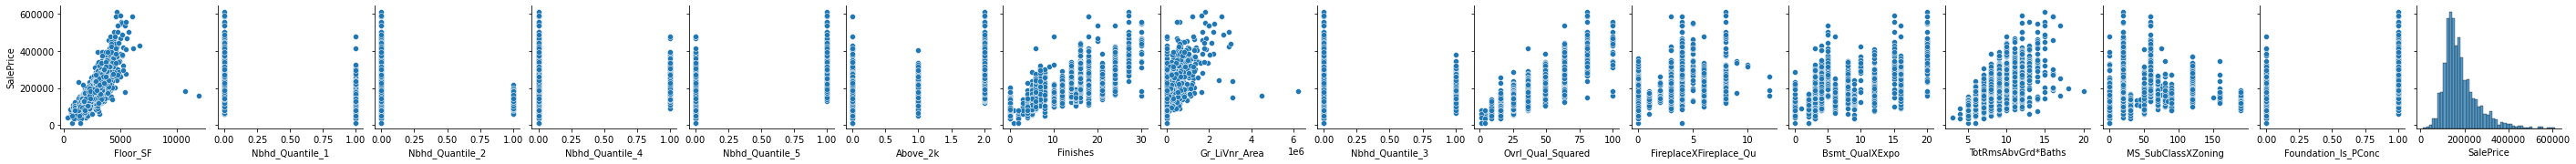

In [115]:
pp = sns.pairplot(data=XplusSP,
                  y_vars=['SalePrice'])

#### PAIRPLOT AND COEFFICIENT TAKEAWAYS
The plots themselves indicate a moderately linear to extremely linear relationship with the target variable. A lot of this information is backed up by the coefficients but the ones who have lower coefficients generally are either the dummy columns which have a variety of 0's attached to them by their nature but in the case of MS_SubClassXZoning, it presents a situation where it should likely be negatively linearly related but due to outliers it damages the coefficient rating. My model is worse without it however, and it does not create a collinear effect with any of the other features. The SalePrice itself is not a Gaussian distribution as it is not perfectly normal.

In [116]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS
def autocorr(i):
    X =np.arange(len(XminusSP[[i]]))
    Y = np.asarray(XminusSP[[i]])
    ols_res = OLS(Y,X).fit()
    print(feature)
    print(durbin_watson(ols_res.resid))
for feature in features:
    autocorr(feature)

Floor_SF
0.6106200975498928
Nbhd_Quantile_1
1.895510170387139
Nbhd_Quantile_2
1.9183974759935427
Nbhd_Quantile_4
1.845350230620537
Nbhd_Quantile_5
1.9600746750572222
Above_2k
1.7716631149344932
Finishes
1.2783588959576542
Gr_LiVnr_Area
1.901812788220979
Nbhd_Quantile_3
1.821841408886631
Ovrl_Qual_Squared
0.9020960031895072
FireplaceXFireplace_Qu
1.6929711263117702
Bsmt_QualXExpo
1.4477401461063901
TotRmsAbvGrd*Baths
0.39492426635299316
MS_SubClassXZoning
1.526297454581235
Foundation_Is_PConc
1.7851359120645414


#### NOT ALL FEATURES HAVE NO AUTOCORRELATION
This is a problem that I initially stressed over but when looking at it from the macro and the amount of tests I have done, I have determined that this violation is not nearly as eggregious as some of my prior models as the variance and noise potentially caused by this is limited towards dealing with houses that are high in value. Mostly, it will determine the correct outcome but due to this variance towards more expensive houses, it's more difficult to infer the residuals and error. That being said, only 3 of them heavily lean towards one side of the spectrum and the removal of those would create worse models overall for both predictive and inferrence value.

In [117]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [118]:
vif_data

,feature,VIF
0,Floor_SF,3.693983
1,Nbhd_Quantile_1,6.056358
2,Nbhd_Quantile_2,2.863838
3,Nbhd_Quantile_4,7.714405
4,Nbhd_Quantile_5,6.929763
5,Above_2k,2.017755
6,Finishes,3.087063
7,Gr_LiVnr_Area,1.631167
8,Nbhd_Quantile_3,9.828275
9,Ovrl_Qual_Squared,3.914828


#### DOES NOT VIOLATE "NO COLLINEARITY" ASSUMPTION
My features do not violate the collinearity assumption on the basis of them all having a VIF under 10, while some are definitely on the edge of that. It does not outright violate that assumption and the key linear variables as well, are all sharply under 5 (non-quantile related). The uncorrelatedness implies independence which in turn could imply normality among the distributions.

[normality]('https://stats.stackexchange.com/questions/71394/independence-of-multivariate-normal-distribution')

[VIF]('https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/')

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
X_train.head()

,Floor_SF,Nbhd_Quantile_1,Nbhd_Quantile_2,Nbhd_Quantile_4,Nbhd_Quantile_5,Above_2k,Finishes,Gr_LiVnr_Area,Nbhd_Quantile_3,Ovrl_Qual_Squared,FireplaceXFireplace_Qu,Bsmt_QualXExpo,TotRmsAbvGrd*Baths,MS_SubClassXZoning,Foundation_Is_PConc
532,3174.0,0,0,0,0,0,6,479274.0,1,36,4,3,9.0,20,0
415,3793.0,0,1,0,0,0,21,0.0,0,49,8,3,10.0,70,0
273,1922.0,0,0,0,0,1,10,0.0,1,25,0,3,7.0,20,0
1460,3862.0,0,0,1,0,0,14,0.0,0,49,0,20,11.0,60,1
250,3935.0,0,0,0,1,0,16,1165466.0,0,64,3,12,12.0,60,1


In [120]:
lr.fit(X_train, y_train)

LinearRegression()

In [121]:
lr.score(X_train, y_train)

0.8349681791400415

In [122]:
cross_val_score(lr, X_train, y_train).mean()

0.819474545864583

In [123]:
preds = lr.predict(X_train)

In [124]:
metrics.r2_score(preds, y_train)

0.8023495685400617

In [125]:
metrics.mean_squared_error(preds, y_train)

1043747089.0849487

In [126]:
metrics.mean_squared_error(preds, y_train, squared = False)

32307.07490759491

In [127]:
metrics.mean_absolute_error(preds, y_train)

20976.529848268463

In [128]:
r2adj(lr, X_train, y_train)

0.8333417157281497

In [129]:
residuals = y_train - preds

Text(0.5, 1.0, 'Predictions on Training Datasets')

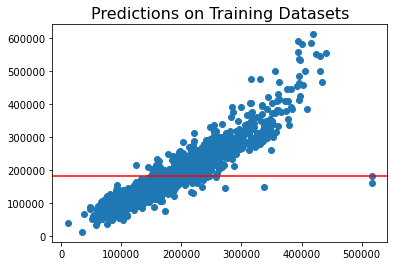

In [130]:
plt.scatter(x=preds, y=y_train)
plt.axhline(preds.mean(), color='r')
plt.title('Predictions on Training Datasets', fontsize = 16)

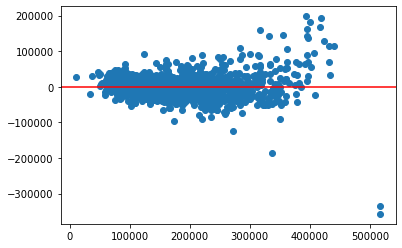

In [131]:
plt.scatter(x=preds, y=residuals)
plt.axhline(0, color='r')

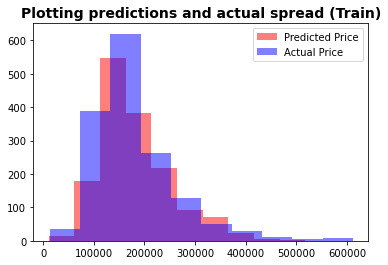

In [132]:
plt.hist(preds, color='r', alpha=.5)
plt.hist(y_train, color = 'blue', alpha=.5)
plt.title('Plotting predictions and actual spread (Train)', fontsize=14, fontweight='bold')
#handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [preds, y_train]]
#labels= ["Predicted Price", "Actual Price"]
#plt.legend(handles, labels)
plt.legend(['Predicted Price', 'Actual Price'])

In [133]:
lr.score(X_test, y_test)

0.850576361695869

In [134]:
cross_val_score(lr, X_test, y_test).mean()

0.8690085148953708

In [135]:
testpreds = lr.predict(X_test)

In [136]:
metrics.r2_score(testpreds, y_test)

0.8238521757589996

In [137]:
metrics.mean_squared_error(testpreds, y_test)

917464834.4803983

In [138]:
metrics.mean_squared_error(testpreds, y_test, squared = False)

30289.681980509442

In [139]:
metrics.mean_absolute_error(testpreds, y_test)

21947.81460302324

In [140]:
r2adj(lr, X_test, y_test)

0.8460665939402112

In [141]:
residuals = y_test - testpreds
residuals

1124     1699.697969
188      1404.325751
1727   -70760.022135
1658   -21295.940088
1424    -6811.594906
            ...     
572       912.522209
548     20388.642911
530    -24811.841916
445     11403.760220
693      2883.845624
Name: SalePrice, Length: 513, dtype: float64

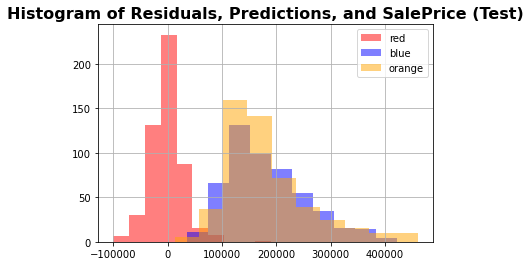

In [142]:
residuals.hist(color='r', alpha=.5)
plt.hist(x = testpreds, color='blue', alpha=.5)
plt.hist(x = y_test, color='orange', alpha=.5)
plt.legend(['red', 'blue', 'orange'])
plt.title('Histogram of Residuals, Predictions, and SalePrice (Test)', fontsize = 16, fontweight = 'bold')
plt.savefig('../graphs/hist_mainmodel', bbox_inches='tight')

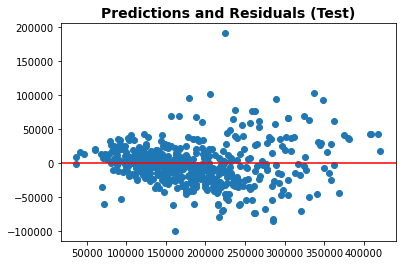

In [143]:
plt.scatter(x=testpreds, y=residuals)
plt.axhline(0,color='r')
plt.title('Predictions and Residuals (Test)', fontsize = 14, fontweight = 'bold')
plt.savefig('../graphs/preds_residuals_test_mainmodel', bbox_inches='tight')

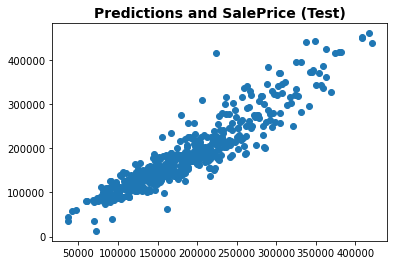

In [144]:
plt.scatter(x=testpreds, y=y_test)
plt.title('Predictions and SalePrice (Test)', fontsize = 14, fontweight = 'bold')
plt.savefig('../graphs/preds_saleprice_test_mainmodel', bbox_inches='tight')

In [145]:
sc = StandardScaler()
sc.fit(X_train)
Z_train = sc.transform(X_train)
Z_test = sc.transform(X_test)

print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y_test.shape}')

ols = LinearRegression()
ols.fit(Z_train, y_train)

ols.score(Z_train, y_train), ols.score(Z_test, y_test)

Z_train shape is: (1538, 15)
y_train shape is: (1538,)
Z_test shape is: (513, 15)
y_test shape is: (513,)


(0.8349681791400415, 0.8505763616980111)

# KAGGLE SUBMISSION

In [146]:
test['Ovrl_Qual_Squared'] = test['Overall_Qual'] ** 2

test['FireplaceXFireplace_Qu'] = test['Fireplaces'] * test['Fireplace_Qu']

test['Garage_CondXQual'] = test['Garage_Cond'] * test['Garage_Qual']

test['Bsmt_CondXQual'] = test['Bsmt_Qual'] * test['Bsmt_Cond']

test['Garage_FinishXQual'] = test['Garage_Finish'] * test['Garage_Qual']

test['Bsmt_QualXExpo'] = test['Bsmt_Qual'] * test['Bsmt_Exposure']

test['Exter_Qual_Squared'] = test['Exter_Qual'] ** 2

test['Garage_Qual_Squared'] = test['Garage_Qual'] ** 2

test['Kitchen_Qual_Squared'] = test['Kitchen_Qual'] ** 2

test['MS_SubClassXZoning'] = test['MS_SubClass'] * test['MS_Zoning_Is_Valued']

test['KitchenAbvGrXKqual'] = test['Kitchen_AbvGr'] * test['Kitchen_Qual']

test['Gr_liv_AreaX1st_SF'] = test['Gr_Liv_Area'] * test['1st_Flr_SF']

test['Floor_SF'] = test['1st_Flr_SF'] + test['2nd_Flr_SF'] + test['Total_Bsmt_SF'] + test['Wood_Deck_SF']
+ test['Low_Qual_Fin_SF'] + test['Open_Porch_SF']

test['YearDiff'] = test['Yr_Sold'] - test['Year_Built']

test['BathsTotal'] = test['Full_Bath'] + test['Half_Bath'] + test['Bsmt_Half_Bath'] + test['Bsmt_Full_Bath']

test['TotRmsAbvGrd*Baths'] = test['TotRms_AbvGrd'] + test['BathsTotal']

test['AdditionalSF'] = test['Wood_Deck_SF'] + test['Open_Porch_SF']

test['Gr_LiVnr_Area'] = test['Mas_Vnr_Area'] * test['Gr_Liv_Area']

test['Above_2k'] = test['Year_Remod_Above_2k'] + test['Year_Built_Above_2k']

test['Finishes'] = test['Overall_Qual'] * test['Garage_Finish']

In [147]:
kagglesubfinal = test
features = ['Floor_SF', 'Nbhd_Quantile_1', 'Nbhd_Quantile_2', 'Nbhd_Quantile_4', 'Nbhd_Quantile_5',
            'Above_2k', 'Finishes', 'Gr_LiVnr_Area', 'Nbhd_Quantile_3',
           'Ovrl_Qual_Squared', 'FireplaceXFireplace_Qu', 'Bsmt_QualXExpo', 'TotRmsAbvGrd*Baths',
           'MS_SubClassXZoning', 'Foundation_Is_PConc']

X = kagglesubfinal[features]
preds = lr.predict(X)
kagglesubfinal['SalePrice'] = preds

In [148]:
kagglesubfinal.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Gr_liv_AreaX1st_SF,Floor_SF,YearDiff,BathsTotal,TotRmsAbvGrd*Baths,AdditionalSF,Gr_LiVnr_Area,Above_2k,Finishes,SalePrice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,1750624,2948,96,2,11,60,0.0,0,6,160578.481653
1,2718,905108090,90,RL,0.0,9662,Pave,NaN,IR1,Lvl,...,3869089,4104,29,2,12,170,0.0,0,15,179532.669225
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,993344,2250,0,4,11,124,0.0,2,14,220473.667356
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,937024,1936,84,1,6,0,0.0,1,5,102105.874758
4,625,535105100,20,RL,0.0,9500,Pave,NaN,IR1,Lvl,...,1943236,2788,46,3,9,76,344318.0,0,12,190705.416621


In [149]:
kagglesubfinal = kagglesubfinal[['Id', 'SalePrice']]

In [150]:
kagglesubfinal.head()

,Id,SalePrice
0,2658,160578.481653
1,2718,179532.669225
2,2414,220473.667356
3,1989,102105.874758
4,625,190705.416621


In [151]:
kagglesubfinal.to_csv('../kaggle_submissions/kagglebegin.csv', index=False)

POSSIBLE TRANSFORM? MAYBE USE POWER-TRANSFORM? MAYBE USE LOG?

DIFFERENT VARIATIONS

In [152]:
features = ['Nbhd_Quantile_1', 'Nbhd_Quantile_2', 'Nbhd_Quantile_4', 'Nbhd_Quantile_5',
            'Above_2k', 'Finishes', 'Gr_LiVnr_Area', 'Nbhd_Quantile_3',
            'FireplaceXFireplace_Qu', 'Bsmt_QualXExpo',
           'Ovrl_Qual_Squared', 'Foundation_Is_PConc']

X = train[features]
y = train['SalePrice']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
lr.fit(X_train, y_train)

LinearRegression()

In [154]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Nbhd_Quantile_1,2.264055
1,Nbhd_Quantile_2,1.519212
2,Nbhd_Quantile_4,4.112196
3,Nbhd_Quantile_5,4.454942
4,Above_2k,1.993338
5,Finishes,3.071038
6,Gr_LiVnr_Area,1.432128
7,Nbhd_Quantile_3,3.697731
8,FireplaceXFireplace_Qu,1.330456
9,Bsmt_QualXExpo,1.425006


In [155]:
preds = lr.predict(X_train)

In [156]:
metrics.r2_score(preds, y_train)

0.7218353908562751

In [157]:
metrics.mean_squared_error(preds, y_train)

1376393685.3825567

In [158]:
metrics.mean_squared_error(preds, y_train, squared = False)

37099.780125798

In [159]:
metrics.mean_absolute_error(preds, y_train)

25428.365367242288

In [160]:
testpreds = lr.predict(X_test)

In [161]:
residuals = y_test - testpreds

In [162]:
metrics.r2_score(testpreds, y_test)

0.7504466080203077

In [163]:
metrics.mean_squared_error(testpreds, y_test)

1233377381.3611472

In [164]:
metrics.mean_squared_error(testpreds, y_test, squared = False)

35119.4729653101

In [165]:
metrics.mean_absolute_error(testpreds, y_test)

25407.120004357756

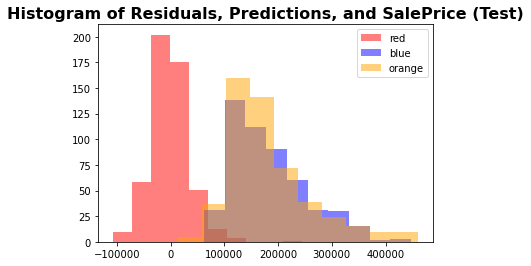

In [166]:
plt.hist(x = residuals, color='r', alpha=.5)
plt.hist(x = testpreds, color='blue', alpha=.5)
plt.hist(x = y_test, color='orange', alpha=.5)
plt.legend(['red', 'blue', 'orange'])
plt.title('Histogram of Residuals, Predictions, and SalePrice (Test)', fontsize = 16, fontweight = 'bold')
plt.savefig('../graphs/hist_lackmodel', bbox_inches='tight')

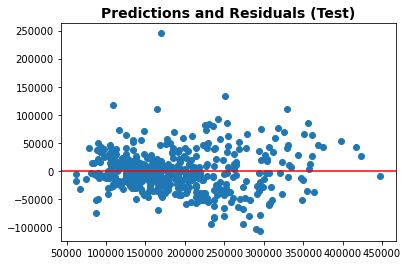

In [167]:
plt.scatter(x=testpreds, y=residuals)
plt.title('Predictions and Residuals (Test)', fontsize = 14, fontweight = 'bold')
plt.axhline(0, color = 'r')
plt.savefig('../graphs/preds_residuals_test_lackmodel', bbox_inches='tight')

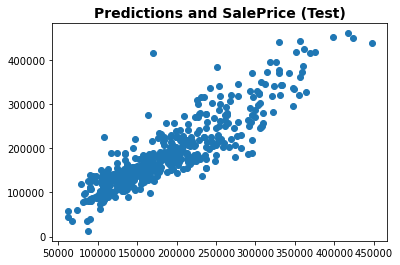

In [168]:
plt.scatter(x=testpreds, y=y_test)
plt.title('Predictions and SalePrice (Test)', fontsize = 14, fontweight = 'bold')
plt.savefig('../graphs/preds_saleprice_test_lackmodel', bbox_inches='tight')

TRANSFORMING X

In [853]:
pt = PowerTransformer()
features = ['Floor_SF', 'Nbhd_Quantile_1', 'Nbhd_Quantile_2', 'Nbhd_Quantile_4', 'Nbhd_Quantile_5',
            'Above_2k', 'Finishes', 'Gr_LiVnr_Area', 'Nbhd_Quantile_3',
           'Ovrl_Qual_Squared', 'FireplaceXFireplace_Qu', 'Bsmt_QualXExpo', 'TotRmsAbvGrd*Baths',
           'MS_SubClassXZoning', 'Foundation_Is_PConc']

X = pt.fit_transform(train[features])
y = train['SalePrice']

In [854]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
lr.fit(X_train, y_train)

LinearRegression()

In [855]:
preds = lr.predict(X_train)

In [856]:
metrics.r2_score(preds, y_train)

0.7651904630051013

In [857]:
metrics.mean_squared_error(preds, y_train)

1203151560.7204616

In [858]:
metrics.mean_squared_error(preds, y_train, squared = False)

34686.47518443553

In [859]:
metrics.mean_absolute_error(preds, y_train)

22911.17655712839

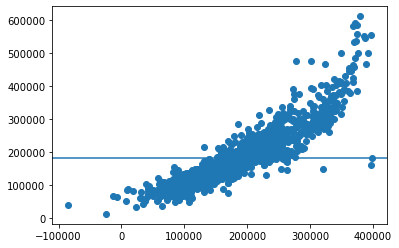

In [860]:
plt.scatter(preds, y_train)
plt.axhline(y_train.mean())

(array([ 34., 390., 620., 263., 129.,  51.,  28.,  10.,   6.,   7.]),
 array([ 13100. ,  72955.7, 132811.4, 192667.1, 252522.8, 312378.5,
        372234.2, 432089.9, 491945.6, 551801.3, 611657. ]),
 <BarContainer object of 10 artists>)

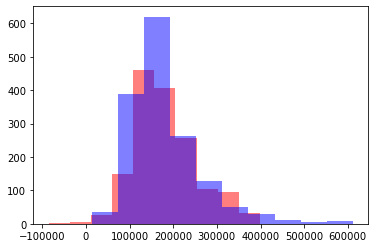

In [861]:
plt.hist(preds, color='r', alpha=.5)
plt.hist(y_train, color = 'blue', alpha=.5)

In [862]:
lr.score(X_test, y_test)

0.8149399119386023

In [863]:
cross_val_score(lr, X_test, y_test).mean()

0.8139511353202364

In [864]:
testpreds = lr.predict(X_test)

In [865]:
metrics.r2_score(testpreds, y_test)

0.782963661623306

In [866]:
metrics.mean_squared_error(testpreds, y_test)

1136273517.2904983

In [867]:
metrics.mean_squared_error(testpreds, y_test, squared = False)

33708.65641479201

In [868]:
metrics.mean_absolute_error(testpreds, y_test)

24420.35215476924

In [869]:
residuals = y_test - testpreds

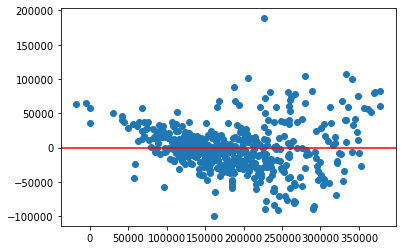

In [870]:
plt.scatter(testpreds, residuals)
plt.axhline(0, color = 'r')

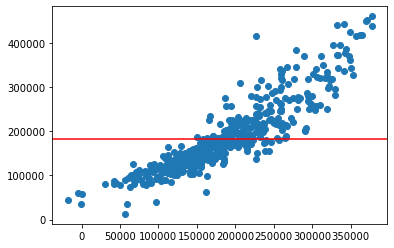

In [871]:
plt.scatter(testpreds, y_test)
plt.axhline(y_test.mean(), color = 'r')

(array([  5.,  37., 160., 141.,  72.,  39.,  24.,  15.,  10.,  10.]),
 array([ 12789. ,  57510.1, 102231.2, 146952.3, 191673.4, 236394.5,
        281115.6, 325836.7, 370557.8, 415278.9, 460000. ]),
 <BarContainer object of 10 artists>)

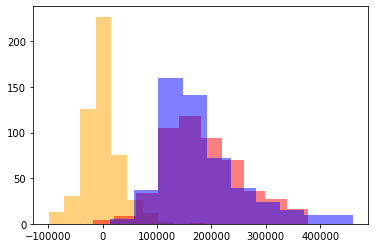

In [872]:
plt.hist(residuals, color='orange', alpha=.5)
plt.hist(testpreds, color='r', alpha=.5)
plt.hist(y_test, color = 'blue', alpha=.5)

# KAGGLE SUBMISSION

In [873]:
kagglesubfinalptx = test
features = ['Floor_SF', 'Nbhd_Quantile_1', 'Nbhd_Quantile_2', 'Nbhd_Quantile_4', 'Nbhd_Quantile_5',
            'Above_2k', 'Finishes', 'Gr_LiVnr_Area', 'Nbhd_Quantile_3',
           'Ovrl_Qual_Squared', 'FireplaceXFireplace_Qu', 'Bsmt_QualXExpo', 'TotRmsAbvGrd*Baths',
           'MS_SubClassXZoning', 'Foundation_Is_PConc']

X = pt.fit_transform(kagglesubfinalptx[features])
preds = lr.predict(X)
kagglesubfinalptx['SalePrice'] = preds

In [874]:
kagglesubfinalptx.head()

kagglesubfinalptx = kagglesubfinalptx[['Id', 'SalePrice']]

kagglesubfinalptx.head()

kagglesubfinalptx.to_csv('../kaggle_submissions/kagglebeginptx.csv', index=False)

In [875]:
kagglesubfinalptx.head()

,Id,SalePrice
0,2658,2.477084e+15
1,2718,1.205245e+16
2,2414,-2.765555e+15
3,1989,2.477084e+15
4,625,-2.765555e+15


POWER TRANSFORMER FOR Y VARIABLE

In [876]:
features = ['Floor_SF', 'Nbhd_Quantile_1', 'Nbhd_Quantile_2', 'Nbhd_Quantile_4', 'Nbhd_Quantile_5',
            'Above_2k', 'Finishes', 'Gr_LiVnr_Area', 'Nbhd_Quantile_3',
           'Ovrl_Qual_Squared', 'FireplaceXFireplace_Qu', 'Bsmt_QualXExpo', 'TotRmsAbvGrd*Baths',
           'MS_SubClassXZoning', 'Foundation_Is_PConc']

X = train[features]
y = LabelEncoder().fit_transform(train['SalePrice'])

In [877]:
y.shape

(2051,)

In [878]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Floor_SF,3.693983
1,Nbhd_Quantile_1,6.056358
2,Nbhd_Quantile_2,2.863838
3,Nbhd_Quantile_4,7.714405
4,Nbhd_Quantile_5,6.929763
5,Above_2k,2.017755
6,Finishes,3.087063
7,Gr_LiVnr_Area,1.631167
8,Nbhd_Quantile_3,9.828275
9,Ovrl_Qual_Squared,3.914828


In [879]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
X_train.head()

lr.fit(X_train, y_train)

LinearRegression()

In [880]:
lr.score(X_train, y_train)

0.8629708717687085

In [881]:
cross_val_score(lr, X_train, y_train).mean()

0.8552070082895995

In [882]:
preds = lr.predict(X_train)

In [883]:
metrics.r2_score(preds, y_train)

0.8412123366898421

In [884]:
metrics.mean_squared_error(preds, y_train)

5736.323019631789

In [885]:
metrics.mean_squared_error(preds, y_train, squared = False)

75.73851741110192

In [886]:
metrics.mean_absolute_error(preds, y_train)

55.648821970418936

In [887]:
r2adj(lr, X_train, y_train)

0.8616203875877168

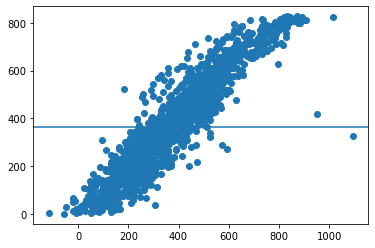

In [888]:
plt.scatter(preds, y_train)
plt.axhline(y_train.mean())

(array([105., 167., 266., 233., 192., 163., 136., 109.,  99.,  68.]),
 array([  1. ,  83.6, 166.2, 248.8, 331.4, 414. , 496.6, 579.2, 661.8,
        744.4, 827. ]),
 <BarContainer object of 10 artists>)

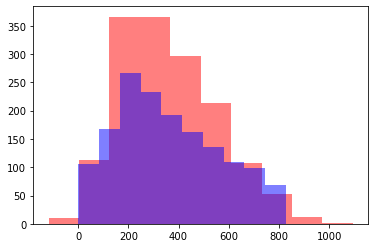

In [889]:
plt.hist(preds, color='r', alpha=.5)
plt.hist(y_train, color = 'blue', alpha=.5)

In [890]:
lr.score(X_test, y_test)

0.8719831096726745

In [891]:
cross_val_score(lr, X_test, y_test).mean()

0.8838375973633275

In [892]:
testpreds = lr.predict(X_test)

In [893]:
metrics.r2_score(testpreds, y_test)

0.8461321322289841

In [894]:
metrics.mean_squared_error(testpreds, y_test)

5621.050963139985

In [895]:
metrics.mean_squared_error(testpreds, y_test, squared = False)

74.97366846526842

In [896]:
metrics.mean_absolute_error(testpreds, y_test)

56.215681713345695

Text(0.5, 1.0, 'Predictions and SalePrice (Test)')

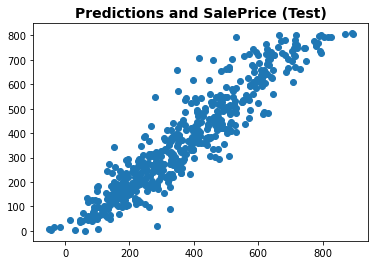

In [897]:
plt.scatter(x=testpreds, y=y_test)
plt.title('Predictions and SalePrice (Test)', fontsize = 14, fontweight = 'bold')

In [898]:
residuals = y_test - testpreds

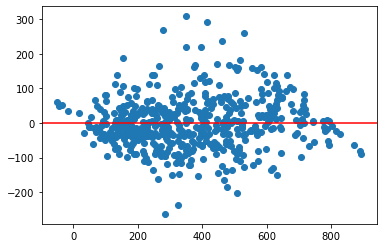

In [899]:
plt.scatter(testpreds, residuals)
plt.axhline(0, color='r')

(array([  2.,   7.,  36., 108., 183., 119.,  31.,  20.,   3.,   4.]),
 array([-263.14511105, -205.92223144, -148.69935183,  -91.47647223,
         -34.25359262,   22.96928699,   80.1921666 ,  137.4150462 ,
         194.63792581,  251.86080542,  309.08368503]),
 <BarContainer object of 10 artists>)

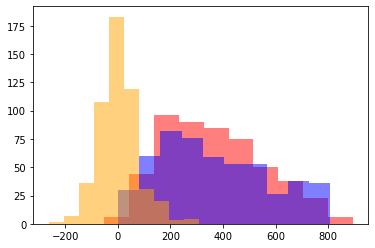

In [900]:
plt.hist(testpreds, color='r', alpha=.5)
plt.hist(y_test, color = 'blue', alpha=.5)
plt.hist(residuals, color='orange', alpha=.5)

##### Now, I am become Power Transformer. The destroyer of competing ML Models.